# Cliques and Communities

In [22]:
from bookworm import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,9)

import pandas as pd
import numpy as np
import networkx as nx

- talk about and give examples of cliques (mention example given previously)
- mention that it's not really good enough

The solution to our problem is the python implementation of louvain community detection [here](https://github.com/taynaud/python-louvain) by Thomas Aynaud. 

In [34]:
import community

This implementation of louvain modularity is a very smart piece of maths, first given by Blondel et al in [Fast unfolding of communities in large networks](https://arxiv.org/pdf/0803.0476.pdf). If you're not a mathematical reader, just skip over this section and go straight to the results.  
If you are interested in the maths, it goes roughly like this

$$
Q = \frac{1}{2m} \sum_{ij} \left[\ A_{ij}\ \frac{k_i k_j}{2m}\ \right]\ \delta(c_i, c_j)
$$

- $m$ is the sum of all of the edge weights in the graph
- $A_{ij}$ represents the edge weight between nodes $i$ and $j$
- $k_{i}$ and $k_{j}$ are the sum of the weights of the edges attached to nodes $i$ and $j$, respectively
- $\delta$ is the delta function.
- $c_{i}$ and $c_{j}$ are the communities of the nodes

First, each node in the network is assigned to its own community. Then for each node $i$, the change in modularity is calculated for removing $i$ from its own community and moving it into the community of each neighbor $j$ of $i$. This value is easily calculated by:

$$
\Delta Q = \left[\frac{\sum_{in} +\ k_{i,in}}{2m} - \left(\frac{\sum_{tot} +\ k_{i}}{2m}\right)^2 \right] - 
\left[ \frac{\sum_{in}}{2m} - \left(\frac{\sum_{tot}}{2m}\right)^2 - \left(\frac{k_{i}}{2m}\right)^2 \right]
$$

- $\sum_{in}$ is sum of all the weights of the links inside the community $i$ is moving into
- $k_{i,in}$ is the sum of the weights of the links between $i$ and other nodes in the community
- $m$ is the sum of the weights of all links in the network
- $\Sigma _{tot}$ is the sum of all the weights of the links to nodes in the community
- $k_{i}$ is the weighted degree of $i$

Once this value is calculated for all communities $i$ is connected to, $i$ is placed into the community that resulted in the greatest modularity increase. If no increase is possible, $i$ remains in its original community. This process is applied repeatedly and sequentially to all nodes until no modularity increase can occur. Once this local maximum of modularity is hit, the first phase has ended.

In the second phase of the algorithm, it groups all of the nodes in the same community and builds a new network where nodes are the communities from the previous phase. Any links between nodes of the same community are now represented by self loops on the new community node and links from multiple nodes in the same community to a node in a different community are represented by weighted edges between communities. Once the new network is created, the second phase has ended and the first phase can be re-applied to the new network.

In [35]:
book = nx.from_pandas_dataframe(bookworm('data/raw/hp_chamber_of_secrets.txt'),
                                source='source',
                                target='target')

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

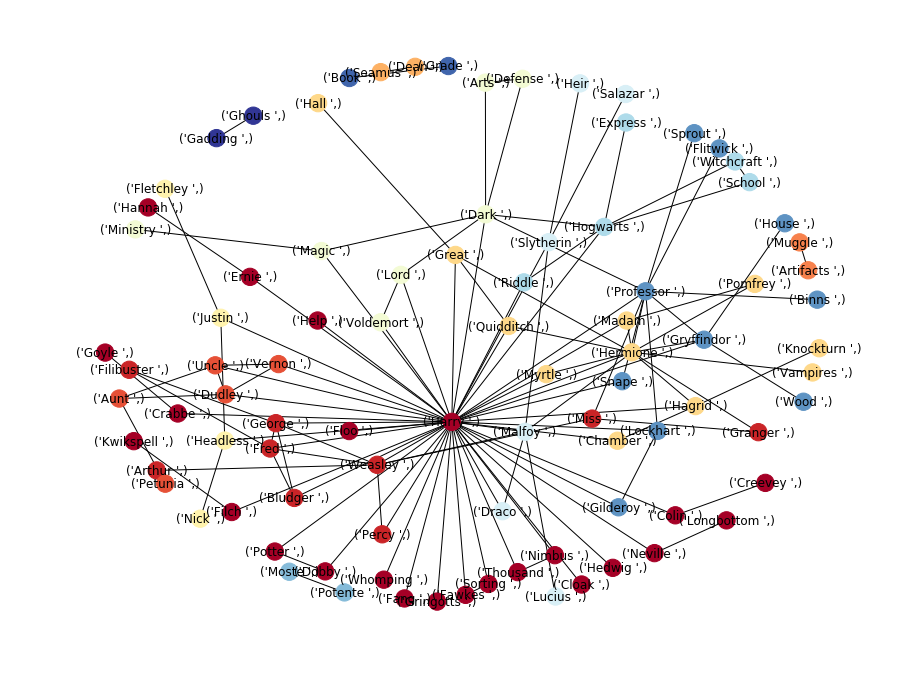

In [36]:
partitions = community.best_partition(book)
values = [partitions.get(node) for node in book.nodes()]

nx.draw(book,
        cmap=plt.get_cmap("RdYlBu"),
        node_color=values,
        with_labels=True)

In [37]:
def draw_with_communities(book):
    '''
    draw a networkx graph with communities partitioned and coloured 
    according to their louvain modularity
    
    Parameters
    ----------
    book : nx.Graph (required)
        the book graph to be visualised
    '''
    partitions = community.best_partition(book)
    values = [partitions.get(node) for node in book.nodes()]

    nx.draw(book,
            cmap=plt.get_cmap("RdYlBu"),
            node_color=values,
            with_labels=True)

In [38]:
book = nx.from_pandas_dataframe(bookworm('data/raw/fellowship_of_the_ring.txt'),
                                source='source',
                                target='target')

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

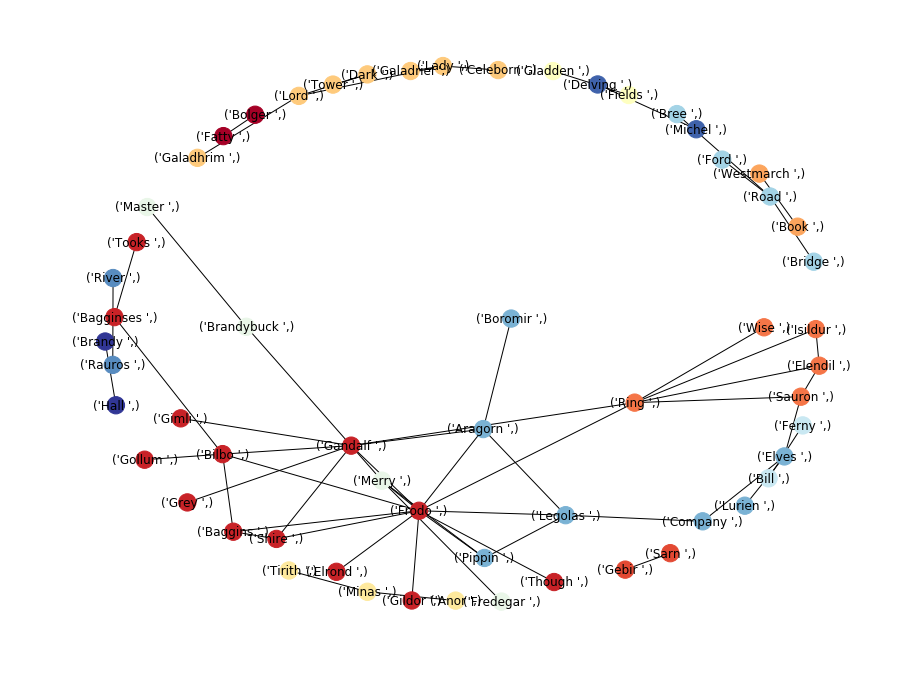

In [39]:
draw_with_communities(book)